In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

%matplotlib inline

In [3]:
# Sakila Database
conn = sqlite3.connect('data/sakila.db')

df = pd.read_sql('''
    SELECT
        rental.rental_id, rental.rental_date, rental.return_date,
        customer.last_name AS customer_lastname,
        store.store_id,
        city.city AS rental_store_city,
        film.title AS film_title, film.rental_duration AS film_rental_duration,
        film.rental_rate AS film_rental_rate, film.replacement_cost AS film_replacement_cost,
        film.rating AS film_rating
    FROM rental
    INNER JOIN customer ON rental.customer_id == customer.customer_id
    INNER JOIN inventory ON rental.inventory_id == inventory.inventory_id
    INNER JOIN store ON inventory.store_id == store.store_id
    INNER JOIN address ON store.address_id == address.address_id
    INNER JOIN city ON address.city_id == city.city_id
    INNER JOIN film ON inventory.film_id == film.film_id
    ;
''', conn, index_col = 'rental_id', parse_dates = ['rental_data', 'return_data'])

In [4]:
df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating
rental_id,,,,,,,,,,
1,2005-05-24 22:53:30.000,2005-05-26 22:04:30.000,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G
2,2005-05-24 22:54:33.000,2005-05-28 19:40:33.000,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R
3,2005-05-24 23:03:39.000,2005-06-01 22:12:39.000,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G
4,2005-05-24 23:04:41.000,2005-06-03 01:43:41.000,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R
5,2005-05-24 23:05:21.000,2005-06-02 04:33:21.000,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17


In [5]:
df.shape

(16044, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16044 entries, 1 to 16049
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   rental_date            16044 non-null  object 
 1   return_date            15861 non-null  object 
 2   customer_lastname      16044 non-null  object 
 3   store_id               16044 non-null  int64  
 4   rental_store_city      16044 non-null  object 
 5   film_title             16044 non-null  object 
 6   film_rental_duration   16044 non-null  int64  
 7   film_rental_rate       16044 non-null  float64
 8   film_replacement_cost  16044 non-null  float64
 9   film_rating            16044 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 1.3+ MB


In [7]:
df.isnull().sum()

rental_date                0
return_date              183
customer_lastname          0
store_id                   0
rental_store_city          0
film_title                 0
film_rental_duration       0
film_rental_rate           0
film_replacement_cost      0
film_rating                0
dtype: int64

In [8]:
df.describe()

,store_id,film_rental_duration,film_rental_rate,film_replacement_cost
count,16044.000000,16044.00000,16044.000000,16044.000000
mean,1.506171,4.93549,2.942630,20.215443
std,0.499978,1.40169,1.649678,6.081771
min,1.000000,3.00000,0.990000,9.990000
25%,1.000000,4.00000,0.990000,14.990000
50%,2.000000,5.00000,2.990000,20.990000
75%,2.000000,6.00000,4.990000,25.990000
max,2.000000,7.00000,4.990000,29.990000


# numerical analysis and visualization¶

In [9]:
df['film_rental_duration'].describe()

count    16044.00000
mean         4.93549
std          1.40169
min          3.00000
25%          4.00000
50%          5.00000
75%          6.00000
max          7.00000
Name: film_rental_duration, dtype: float64

In [10]:
df['film_rental_duration'].mean()

4.935489902767389

In [11]:
df['film_rental_duration'].median()

5.0

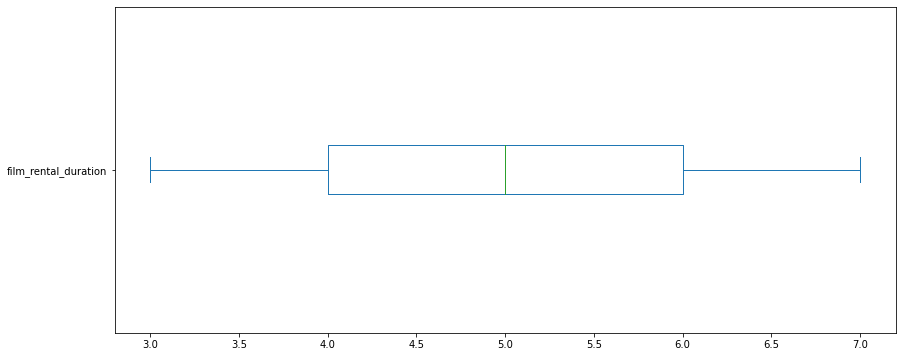

In [12]:
df['film_rental_duration'].plot(kind = 'box', vert = False, figsize = (14, 6))
plt.show()

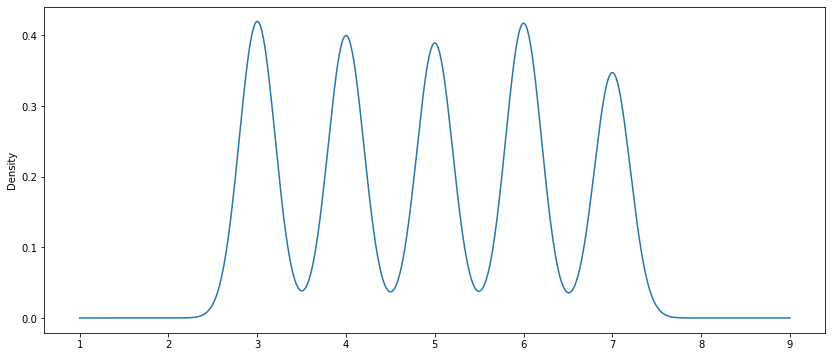

In [13]:
df['film_rental_duration'].plot(kind = 'density', figsize = (14, 6))
plt.show()

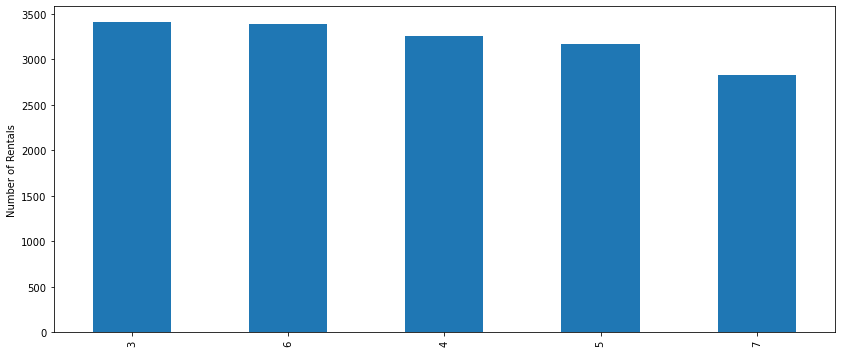

In [14]:
ax = df['film_rental_duration'].value_counts().plot(kind = 'bar', figsize = (14, 6))
ax.set_ylabel('Number of Rentals')
plt.show()

# categorical analysis and visualization

In [15]:
df.head(0)

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating
rental_id,,,,,,,,,,


In [16]:
df['rental_store_city'].value_counts()

Woodridge     8121
Lethbridge    7923
Name: rental_store_city, dtype: int64

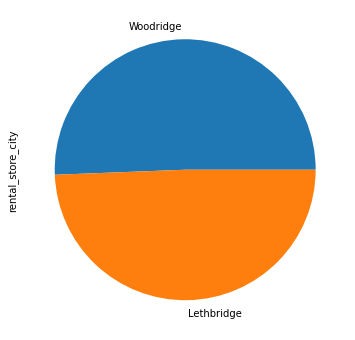

In [17]:
df['rental_store_city'].value_counts().plot(kind = 'pie', figsize = (6, 6))
plt.show()

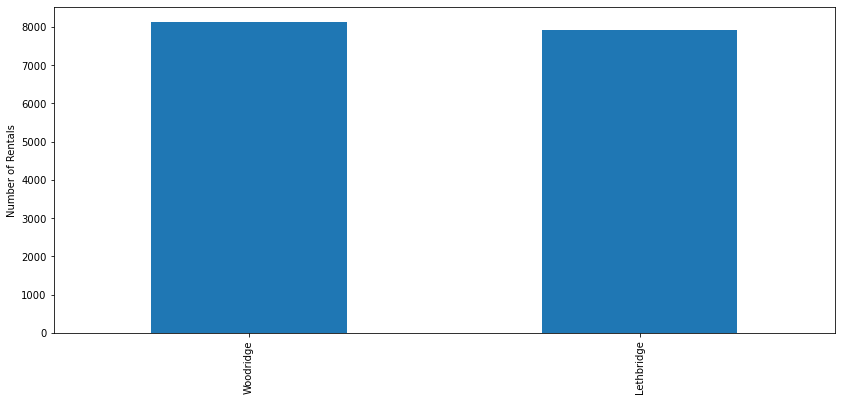

In [18]:
ax = df['rental_store_city'].value_counts().plot(kind = 'bar', figsize = (14, 6))
ax.set_ylabel('Number of Rentals')
plt.show()

# Column wrangling

In [19]:
df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating
rental_id,,,,,,,,,,
1,2005-05-24 22:53:30.000,2005-05-26 22:04:30.000,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G
2,2005-05-24 22:54:33.000,2005-05-28 19:40:33.000,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R
3,2005-05-24 23:03:39.000,2005-06-01 22:12:39.000,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G
4,2005-05-24 23:04:41.000,2005-06-03 01:43:41.000,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R
5,2005-05-24 23:05:21.000,2005-06-02 04:33:21.000,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17


In [20]:
df['rental_gain_return'] = df['film_rental_rate'] / df['film_replacement_cost'] * 100
df['film_replacement_cost'].head()

rental_id
1    21.99
2    16.99
3    14.99
4    21.99
5    29.99
Name: film_replacement_cost, dtype: float64

<AxesSubplot:ylabel='Density'>

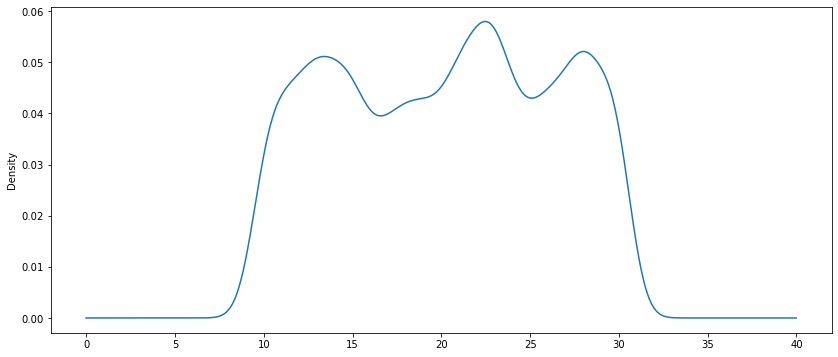

In [21]:
df['film_replacement_cost'].plot(kind = 'density', figsize = (14, 6))

In [22]:
df['rental_gain_return'].mean()

16.343824010240393

In [23]:
df['rental_gain_return'].median()

13.597089586175537

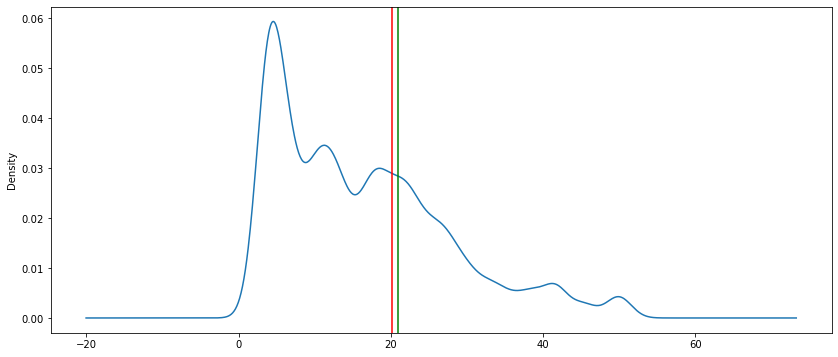

In [24]:
ax = df['rental_gain_return'].plot(kind = 'density', figsize = (14, 6))
ax.axvline(df['film_replacement_cost'].mean(), color = 'red')
ax.axvline(df['film_replacement_cost'].median(), color = 'green')


# Selection and Indexing

In [25]:
df.loc[df['customer_lastname'] == 'HANSEN']

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_gain_return
rental_id,,,,,,,,,,,
5,2005-05-24 23:05:21.000,2005-06-02 04:33:21.000,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17,9.969990
134,2005-05-25 21:48:41.000,2005-06-02 18:28:41.000,HANSEN,2,Woodridge,JUMPING WRATH,4,0.99,18.99,NC-17,5.213270
416,2005-05-27 15:02:10.000,2005-05-29 10:34:10.000,HANSEN,2,Woodridge,LESSON CLEOPATRA,3,0.99,28.99,NC-17,3.414971
809,2005-05-29 19:10:20.000,2005-06-05 19:05:20.000,HANSEN,2,Woodridge,INDIAN LOVE,4,0.99,26.99,NC-17,3.668025
1006,2005-05-31 00:57:08.000,2005-06-02 22:35:08.000,HANSEN,2,Woodridge,SALUTE APOLLO,4,2.99,29.99,R,9.969990
1368,2005-06-15 14:27:47.000,2005-06-23 18:07:47.000,HANSEN,1,Lethbridge,HUNCHBACK IMPOSSIBLE,4,4.99,28.99,PG-13,17.212832
2603,2005-06-19 06:21:25.000,2005-06-26 03:19:25.000,HANSEN,2,Woodridge,CAT CONEHEADS,5,4.99,14.99,G,33.288859
5209,2005-07-09 11:22:39.000,2005-07-17 09:31:39.000,HANSEN,1,Lethbridge,WHALE BIKINI,4,4.99,11.99,PG-13,41.618015
5266,2005-07-09 14:17:40.000,2005-07-16 10:42:40.000,HANSEN,2,Woodridge,LOATHING LEGALLY,4,0.99,29.99,R,3.301100


In [26]:
df['film_replacement_cost'].max()

29.99

In [27]:
df.loc[df['film_replacement_cost'] == df['film_replacement_cost'].max()]

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_gain_return
rental_id,,,,,,,,,,,
5,2005-05-24 23:05:21.000,2005-06-02 04:33:21.000,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17,9.96999
8,2005-05-24 23:31:46.000,2005-05-27 23:33:46.000,ROMERO,1,Lethbridge,LAWLESS VISION,6,4.99,29.99,G,16.63888
30,2005-05-25 04:01:32.000,2005-05-30 03:12:32.000,HOULE,1,Lethbridge,SONG HEDWIG,3,0.99,29.99,PG-13,3.30110
71,2005-05-25 10:26:39.000,2005-05-28 04:59:39.000,HAYES,2,Woodridge,LOATHING LEGALLY,4,0.99,29.99,R,3.30110
76,2005-05-25 11:30:37.000,2005-06-03 12:00:37.000,SMITH,2,Woodridge,PATIENT SISTER,7,0.99,29.99,NC-17,3.30110
...,...,...,...,...,...,...,...,...,...,...,...
15987,2005-08-23 20:22:17.000,2005-08-31 21:46:17.000,SILVERMAN,2,Woodridge,POSEIDON FOREVER,6,4.99,29.99,PG-13,16.63888
15991,2005-08-23 20:27:34.000,2005-08-28 16:48:34.000,RYAN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17,9.96999
15992,2005-08-23 20:28:32.000,2005-08-24 21:35:32.000,HERRMANN,2,Woodridge,RIVER OUTLAW,4,0.99,29.99,PG-13,3.30110


In [28]:
df.loc[(df['film_rating'] == 'PG') | (df['film_rating'] == 'PG-13')].shape[0]

6797